# Context

Survival - Выживший:	0 = Нет, 1 = Да
Pclass	- Класс каюты:	1 = 1-ый, 2 = 2-ой, 3 = 3-ий
Sex	- Пол
Age	- Возраст в годах
Sibsp - Сестры или братья / родственники не на борту Титаника
Parch - Родители / дети не на борту Титаника
Ticket	- Номер билета
Fare - Стоимость билета
Cabin	- Номер каюты
Embarked - Порт посадки:	C = Cherbourg, Q = Queenstown, S = Southampton

# Data quality assessment

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
titanic = pd.read_csv('train.csv', sep=',')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
5,5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,S
6,6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,NaN,S
7,7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,NaN,S
8,8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,S
9,9,0,2,"Greigo, Rudy",male,66.00,0,0,6981,9.14,D2969,C


При рассмотрении данных, можно определить явные переменные, которые не оказывают никакого влияния на полученные результаты. Таким образом сразу можно исключить переменные 'Name' и 'fare'. Так как 'fare' - стоимость билета влияет только на класс каюты пассажира, однако не оказывает влияния на итоговый результат. Номер билета - 'Ticket', место посадки - 'Embarked' также как и номер каюты - 'Cabin', тоже не влияют на выживаемость пассажира.

In [86]:
titanic_data = titanic.drop(columns=['Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Sex          100000 non-null  object 
 4   Age          96708 non-null   float64
 5   SibSp        100000 non-null  int64  
 6   Parch        100000 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 5.3+ MB


# Data exploration

Из полученной информации видно, что значения Age, Ticket, Fare, Cabin и Embarket имеют некоторое количество пропусков. Для того, чтобы определить, являются ли данные переменные значимыми, построим тепловую карту, отражающую корреляцию переменных.
Так как данный тип графиков применим только для числовых переменных, следует заменить категориальные значения на числовые. Таким образом, в графе Sex, изменим значение male - 0, female - 1.

<AxesSubplot:>

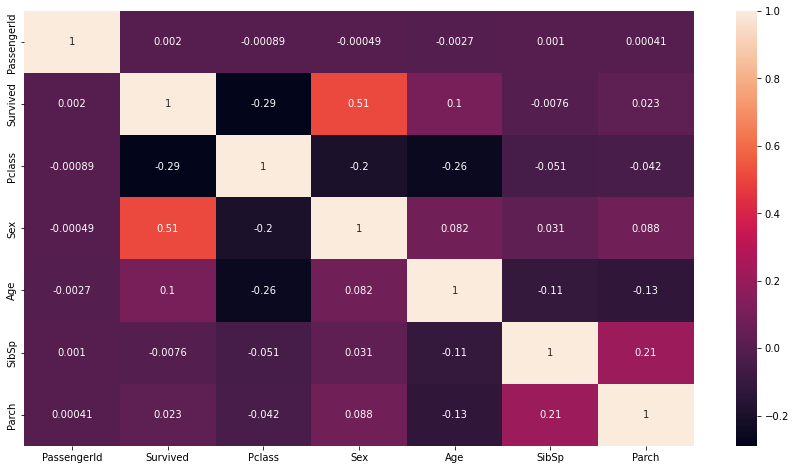

In [87]:
titanic_data['Sex'] = titanic_data['Sex'].replace({'male': 0, 'female': 1})
plt.figure(figsize = (15,8))
sns.heatmap(titanic_data.corr(), annot=True)

Исходя из полученных данных, можно сделать выводы,что наиболее коррелирующими признаками в данном датасете являются Survived и Sex.

<AxesSubplot:xlabel='Survived', ylabel='Age'>

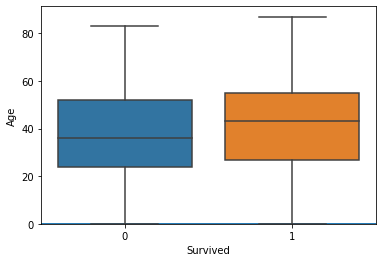

In [95]:
sns.kdeplot(titanic_data['Age'])
sns.boxplot(x=titanic_data['Survived'], y=titanic_data['Age'])

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

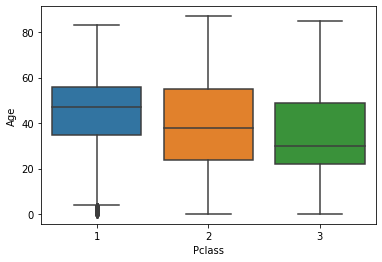

In [97]:
sns.boxplot(x=titanic_data['Pclass'], y=titanic_data['Age'])

# Summary